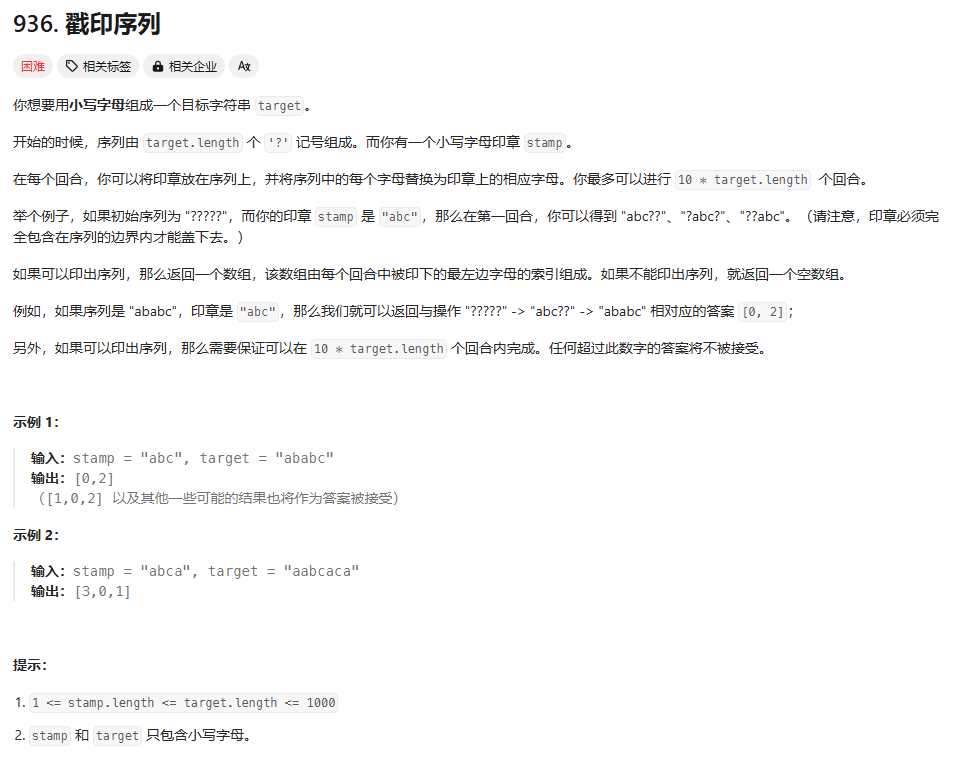

In [16]:
class Solution:
    def movesToStamp(self, stamp, target):
        m,n=len(stamp),len(target)
        in_degree=[m]*(n-m+1) # 每个窗口的入度，表示每个窗口还有多少个字符不能被stamp覆盖
        edges=[[] for _ in range(n)] # 
        seen = [False] * n
        queue = []
        for i in range(n-m+1):
            for j in range(m):
                if target[i+j]==stamp[j]:
                    in_degree[i]-=1 # 若第i个窗口的第j个字符与stamp的第j个字符一致，则入度减1
                    if in_degree[i]==0:
                        queue.append(i) # 若窗口i的入度为0表示该窗口与stamp完全匹配，加入到去队列中
                else:
                    edges[i + j].append(i) # 若第i个窗口的第j个字符与stamp的第j个字符不一致，则在target的第i+j个字符与窗口j之间连边
        result = []
        while queue:
            cur=queue.pop()
            result.append(cur)
            for i in range(m):
                if not seen[cur+i]:
                    seen[cur+i] = True
                    for edge in edges[cur+i]:
                        in_degree[edge] -= 1
                        if in_degree[edge]==0:
                            queue.append(edge)
        return result[::-1] if len(result)==(n-m+1) else []

In [17]:
stamp = "abc"
target = "ababc"

In [18]:
so=Solution()
so.movesToStamp(stamp, target)

[1, 0, 2]